In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [67]:
train_set = pd.read_csv(r'C:\Users\meirk\Desktop\fashionMnist\fashion-mnist_train.csv\fashion-mnist_train.csv')

In [104]:
train_copy = train_set.copy()
train_copy

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
labels_list = {0: 't-shirt', 1: 'pants', 2: 'swetear', 3: 'dress', 4: 'coat',
              5: 'sandal', 6: 'shirt', 7: 'shoe', 8: 'bag', 9: 'boot'}

labels_df = pd.DataFrame([[0,'t-shirt'], [1,'pants'], [2,'swetear'], [3,'dress'], [4,'coat'],
              [5,'sandal'], [6,'shirt'], [7,'shoe'],[8,'bag'],[9,'boot']], columns=["id", "category"])
labels_df

,id,category
0,0,t-shirt
1,1,pants
2,2,swetear
3,3,dress
4,4,coat
5,5,sandal
6,6,shirt
7,7,shoe
8,8,bag
9,9,boot


In [106]:
train_copy = train_copy.merge(right= labels_df,how='inner',
                                      left_on='label', right_on='id').drop(axis =1,columns='id')
train_copy

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,category
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
1,2,0,0,0,0,1,1,0,0,0,...,0,118,190,162,82,0,0,0,0,swetear
2,2,0,0,0,0,0,0,0,0,16,...,0,1,1,1,1,0,0,0,0,swetear
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants
59997,1,0,0,0,0,0,0,0,0,24,...,25,0,0,0,0,0,0,0,0,pants
59998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants


### Data vizualizaton

In [107]:
def get_pixel_cols():
    return ['pixel' + str(i) for i in range(1, 785)]

def index_to_pixels(df, index):
    return df.iloc[index][get_pixel_cols()]

def plot_image_pd(pixels_series):
    pix_mat = pixels_series.values.reshape(28, 28)
    imgplot = plt.imshow(pix_mat, cmap='gray')

In [108]:
labels = train_set.label.value_counts().index.values.tolist()
labels = sorted(labels)

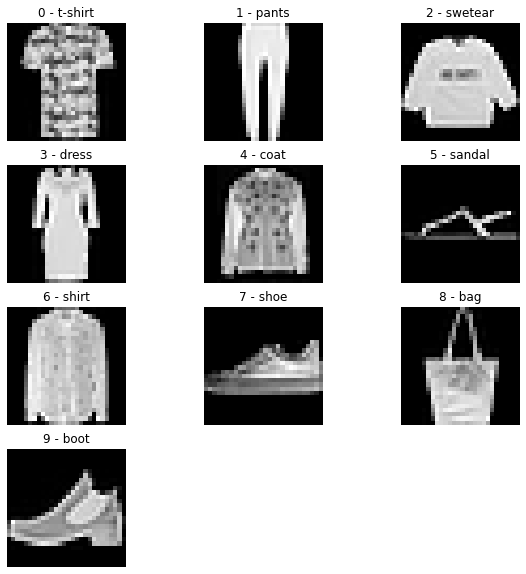

In [109]:
plt.figure(figsize=(10,10))
plt.plot([4, 3, 11])
for lab in labels:
    ax = plt.subplot(4, 3, lab+1)
    ax.set_title(str(lab) + " - " + labels_list[lab])
    plt.axis('off')
    plot_image_pd(index_to_pixels(train_set, train_set[train_set.label == lab].index[0]))

##### See if the data is balanced (distribution)

In [110]:
df_count = train_copy.groupby(['label','category'])['pixel1'].count()
df_count

label  category
0      t-shirt     6000
1      pants       6000
2      swetear     6000
3      dress       6000
4      coat        6000
5      sandal      6000
6      shirt       6000
7      shoe        6000
8      bag         6000
9      boot        6000
Name: pixel1, dtype: int64

The data is balanced, it means each label has the same data points that represent it.

Lets look on it with catplot:

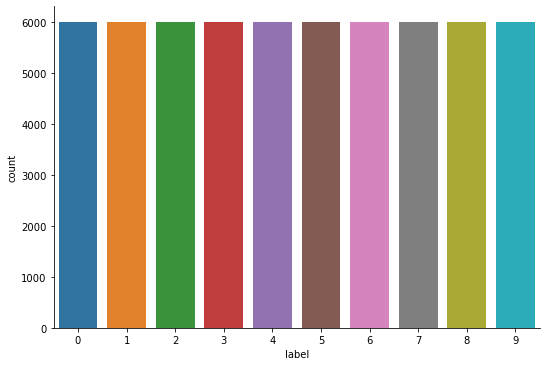

In [112]:
sns.catplot(data=train_copy,kind='count',height=5,aspect=1.5,x='label')

In [76]:
target_set = train_set['label']
train_without_label = train_set.drop(['label'], axis = 1)

### Feature engineering:

In [38]:
train_set.info()
# No need to encode any feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [39]:
train_set.isnull().sum()
#No null values, no action required

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Scaling:

In [87]:
scaler = StandardScaler()
train_without_label_scaled = scaler.fit_transform(train_set.iloc[:,:-1].values)
#train test split
x_train, x_test, y_train, y_test =train_test_split(train_without_label_scaled, target_set, test_size=0.2, random_state=42)

### Dimensionality reduction using PCA:

In [100]:
pca = PCA(n_components=0.95, random_state=42)
x_train_pca = pca.fit_transform(train_without_label_scaled)
x_test_pca =pca.transform(x_test)

In [90]:
print("x_train before pca: ",x_train.shape,"x_test after pca: ", x_train_pca.shape)

x_train before pca:  (48000, 784) x_test after pca:  (48000, 254)


In [108]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42))
              ,('knn',KNeighborsClassifier())]

ada_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
stacking_clf = StackingClassifier(estimators=estimators)
xgb_clf = XGBClassifier()
rnd_clf = RandomForestClassifier()
gnb_clf = GaussianNB()

classifiers = [ada_clf, grad_clf, stacking_clf, xgb_clf, rnd_clf, gnb_clf]
names = ['adaBoost', 'gradientBoost', 'Stacking', 'randomForest']

In [109]:
scores = []
for model in classifiers:
    x_train_, x_test_, y_train_, y_test_ = train_test_split(x_train_pca, target_set, test_size=0.3, random_state=42)
    model.fit(x_train_,y_train_)
    pred = model.predict(x_test_)
    scores.append(metrics.accuracy_score(y_pred=pred,y_true=y_test_))
score = pd.DataFrame(data=scores, index=names)

KeyboardInterrupt: 